# MNIST Coding  (Machine Learning Section)

Group Members: Craig Bunce, Miguel Chevres-Lopez, Zihao Zhang

Instructor: Maria Wang / EAI 6080 - Adv. Analytical Utilization

## Data Ingestion

We selected the MNIST original dataset (MNIST_784) for training. The MNIST Original dataset includes 70,000 instances, which is much larger than Digits Dataset. The increasing sample size can lead to poor training performance. But it allows us to find problems with the orignial model and optimize the algorithm. 

In [1]:
# load_digits includes 1797 samples of size 8x8 from the UCI ML dataset:
# from sklearn.datasets import load_digits
# digits = load_digits()

# fetch_openml downloads the MNIST dataset from http://mldata.org/repository/data/viewslug/mnist-original/
# which contains 70,000 samples of size 28x28 pixels
# load the MNIST Original dataset in Python sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print('MNIST_784 Data Shape', mnist.data.shape)
# 70,000 Labels (integers from 0-9)
print('MNIST Label Data Shape', mnist.target.shape)

MNIST_784 Data Shape (70000, 784)
MNIST Label Data Shape (70000,)


## Data Preview & Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:10], train_lbl[0:10])):
    label = int(label)
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

<Figure size 2000x400 with 10 Axes>

Two ways to display each digit in the training set.

1. Use sort() function to reorder the whole original dataset (mnist.data.) But the time and space complexity of this approach is very high.

2. Traverse the dataset and print the image. We can define the number of images we want to print as pic_num. Stop plotting until pic_num digit images have been displayed.

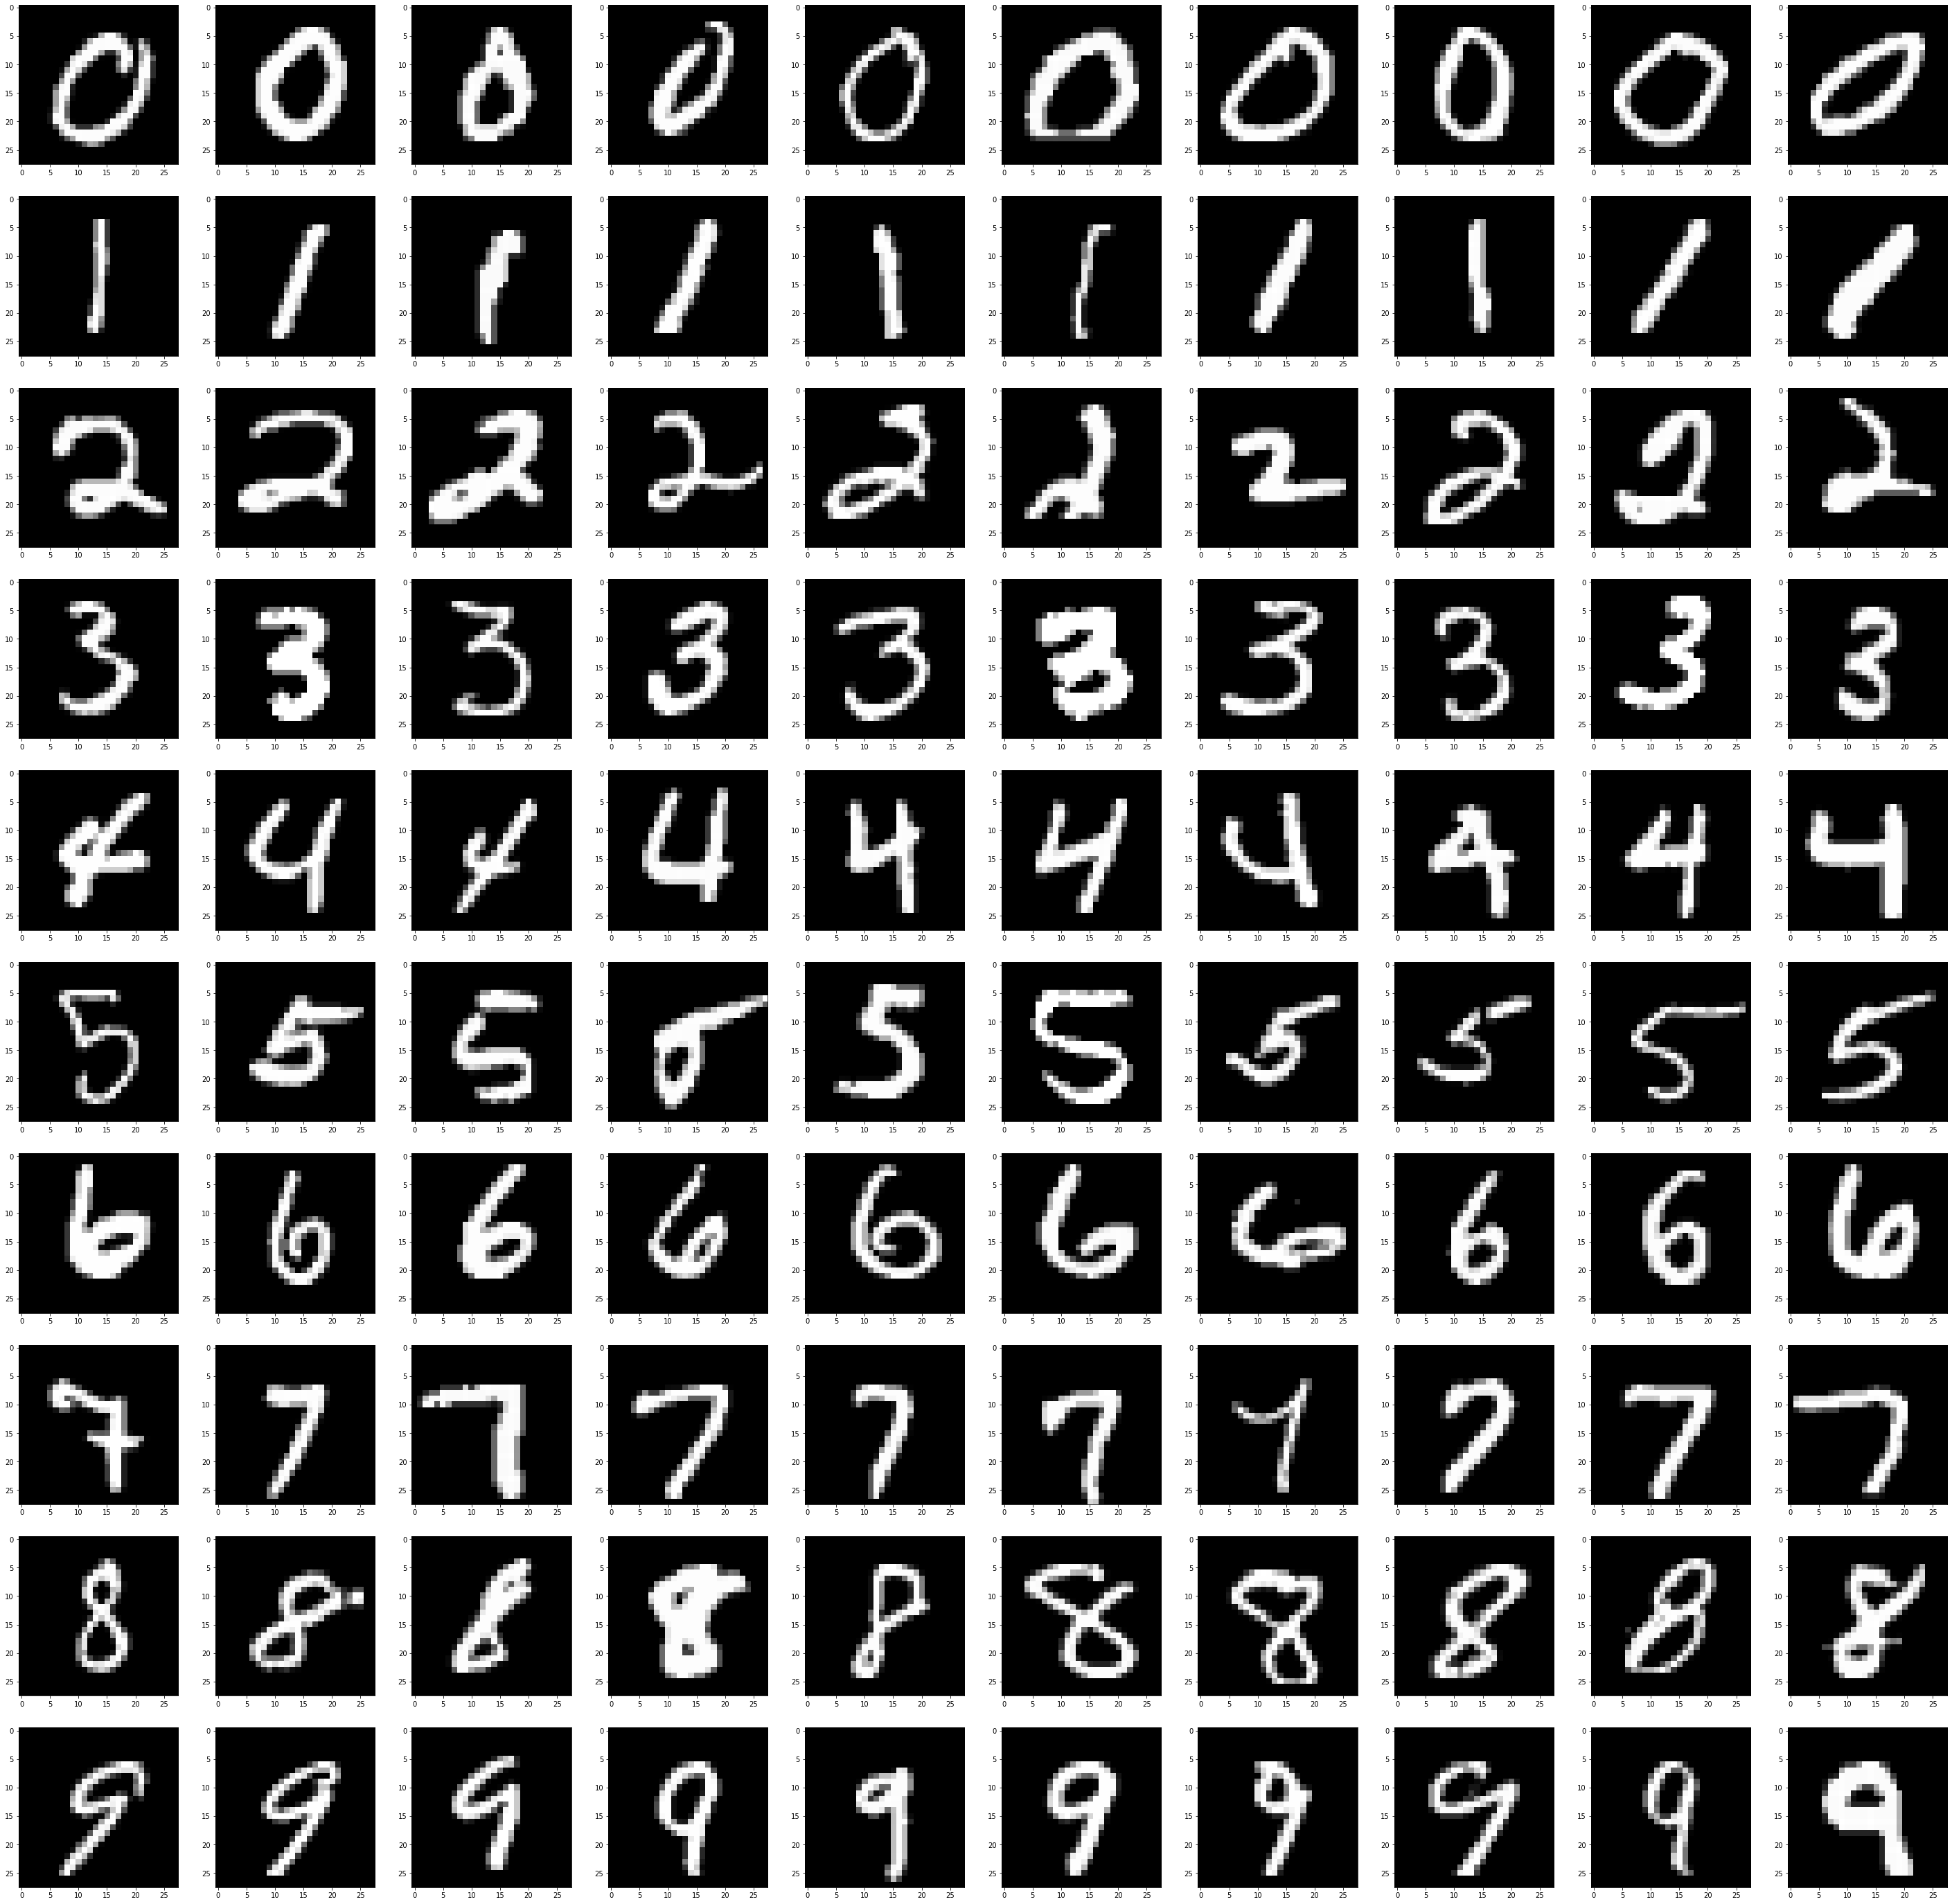

In [5]:
plt.figure(figsize=(50,50))
pic_num = 10 # the number of each handwritten digital image we want to plot
dig_flag = [pic_num for _ in range(10)]
for index, (image, label) in enumerate(zip(train_img[0:150], train_lbl[0:150])):
    label = int(label)
    if dig_flag[label] != 0:
        dig_flag[label] = dig_flag[label] - 1
        plt.subplot(pic_num, 10, pic_num*(label+1)-dig_flag[label])
        plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
plt.show()

## Logistic Regression



In [6]:
# Train a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

In [ ]:
# Parameter estimation using grid search with cross-validation

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

penalty_options = ['l2']
#solver_options = ['liblinear', 'newton_cg', 'lbfgs', 'sag']
tol_options = [1e-3, 1e-4, 1e-5]
c_options = [2e-1, 15e-2, 1e-1]
param_options = dict(penalty = penalty_options, C = c_options, tol = tol_options)

gridlog = GridSearchCV(lr, param_options, cv=10, scoring='accuracy', verbose=1)
gridlog.fit(train_img, train_lbl)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages

C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be change

In [ ]:
# Evaluate the training results

print('The best score is: ', str(gridlog.best_score_))
print('The best params are: ', str(gridlog.best_params_))

The Best Parameters for Logistic Regression:

Penalty: l2 (default)
    
    Used to specify the norm used in the penalization.
    l2 stands for ridge regression

C: 0.2

    Inverse of regularization strength. Smaller values specify stronger regularization.

tol: 1e-4 (default)

    Tolerance for stopping criteria. 

max_iter: 800

    Maximum number of iterations taken for the solvers to converge

In [7]:
# Train the classifier by the best parameters

lr = LogisticRegression(penalty='l2', tol=0.0001, C=0.2, max_iter=800)
lr.fit(train_img, train_lbl)

# Make predictions on entire test data
preds_lr = lr.predict(test_img)

C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
# ML Validation
# Use score method to get accuracy
score_lr = lr.score(test_img, test_lbl)
print(f"LR Score = {score_lr*100:.2f} %")

LR Score = 90.95 %


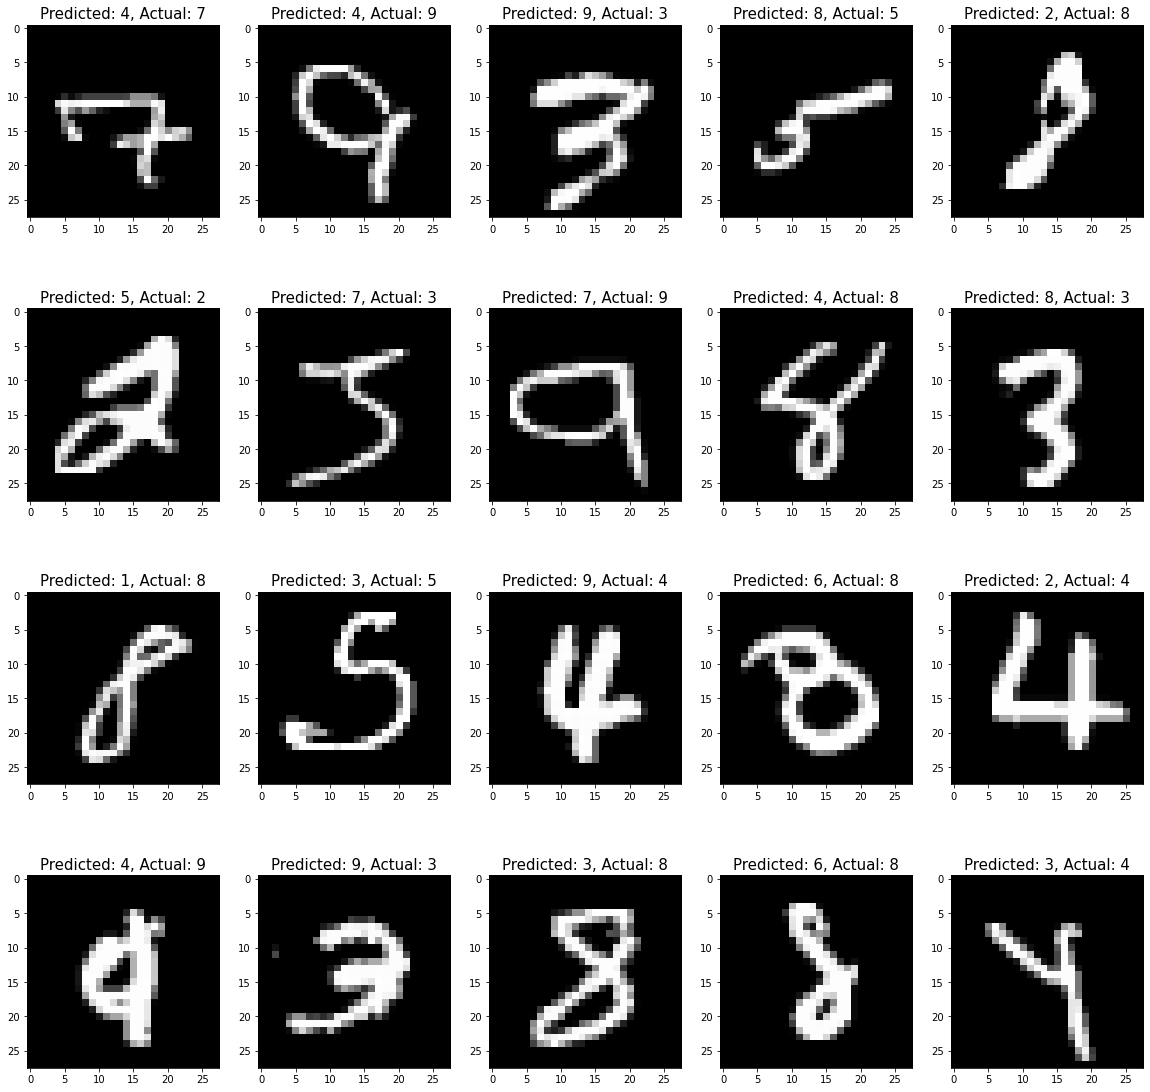

In [9]:
# Inspecting Misclassified Images

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, preds_lr):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index = index + 1

# Plot the misclassified samples

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds_lr[badIndex], test_lbl[badIndex]), fontsize = 15)

In [10]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm_lr = metrics.confusion_matrix(test_lbl, preds_lr)
print(cm_lr)

[[ 971    0    1    1    2    6   10    0    5    0]
 [   0 1109    7    3    1    6    2    1   12    0]
 [   6   16  914   22   11    4   15   13   35    4]
 [   2    6   39  879    2   27    2   13   24   19]
 [   0    3    5    1  893    2    9    5   11   33]
 [   5    2    9   30   12  746   20    5   25    9]
 [   6    2   10    1    7   16  936    0   10    1]
 [   4    4   23    2   15    3    1  969    5   38]
 [   6   18    9   23    9   23    8    4  833   30]
 [   4    7   11   14   39   10    1   32    6  845]]


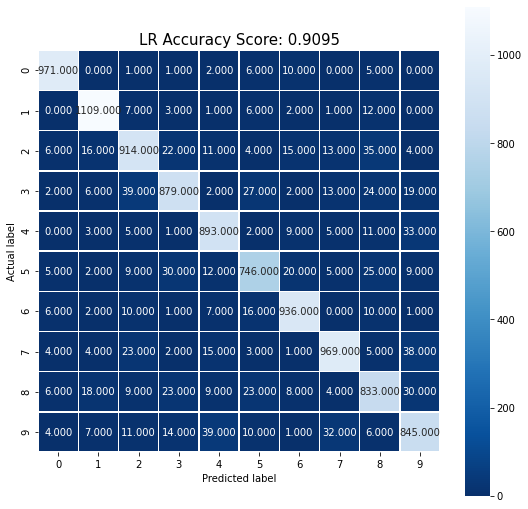

In [12]:
# Confusion Matrix Visualization

plt.figure(figsize=(9,9))
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LR Accuracy Score: {0}'.format(score_lr)
plt.title(all_sample_title, size = 15);

In [13]:
# Model Evaluation
def inspect_performance(model, train_images, train_labels, test_images, test_labels, ypred):
    "Prints training performance, test performance and a performance report"
    print("Training score: ", model.score(train_images, train_labels))
    print("Test score: ", model.score(test_images, test_labels))
    print("Test report: ")
    print(metrics.classification_report(ypred, test_labels))

In [14]:
# LR Evaluation Report
inspect_performance(lr, train_img, train_lbl, test_img, test_lbl, preds_lr)  

Training score:  0.9332833333333334
Test score:  0.9095
Test report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1004
           1       0.97      0.95      0.96      1167
           2       0.88      0.89      0.88      1028
           3       0.87      0.90      0.88       976
           4       0.93      0.90      0.91       991
           5       0.86      0.88      0.87       843
           6       0.95      0.93      0.94      1004
           7       0.91      0.93      0.92      1042
           8       0.87      0.86      0.86       966
           9       0.87      0.86      0.87       979

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# GRID SEARCH FOR OPTIMAL K
accs = []
for k in range(3,6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_img, train_lbl)
    preds = knn.predict(test_img)
    acc = accuracy_score(test_lbl, preds)
    accs.append(acc)

# PLOT GRID SEARCH RESULTS
plt.figure(figsize=(15,5))
plt.plot(range(3,6), accs)
plt.title('MNIST kNN k value versus validation acc')
plt.show()

The Best Parameters for K-nearest Neighbor:

n_neighbors: 3
    
    Number of neighbors to use by default for kneighbors queries

weight: uniform (default)

    weight function used in prediction.
    'uniform' means all points in each neighborhood are weighted equally.

algorithm: auto (default)

    Algorithm used to compute the nearest neighbors.
    'auto' will attempt to decide the most appropriate algorithm based on the values passed to fit method.

leaf_size: 30 (default)

    Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree.

In [17]:
# FIT KNN MODEL
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30)
knn.fit(train_img, train_lbl)

preds_knn = knn.predict(test_img)

In [18]:
score_knn = knn.score(test_img, test_lbl)
print(f"KNN Score = {score_knn*100:.2f} %")

KNN Score = 97.41 %


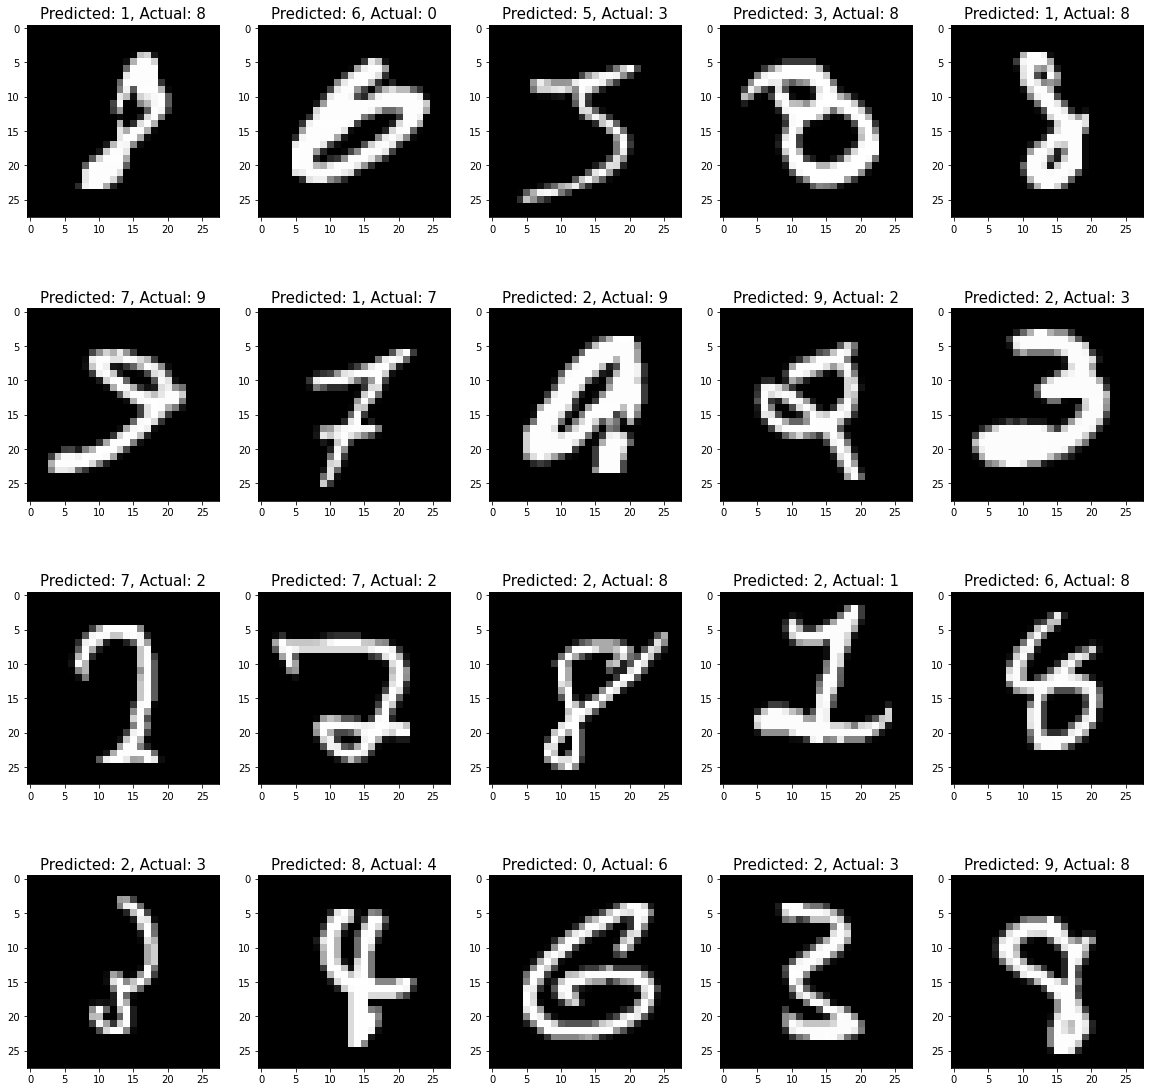

In [19]:
# Inspecting Misclassified Images

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, preds_knn):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index = index + 1

# Plot the misclassified samples

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds_knn[badIndex], test_lbl[badIndex]), fontsize = 15)

In [20]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm_knn = metrics.confusion_matrix(test_lbl, preds_knn)
print(cm_knn)

[[ 989    1    1    0    0    1    4    0    0    0]
 [   0 1140    1    0    0    0    0    0    0    0]
 [   6    4 1011    3    1    0    1   11    2    1]
 [   0    1   13  973    1    9    0    5    9    2]
 [   1    4    1    0  937    0    1    2    1   15]
 [   2    0    1    6    1  833   13    1    2    4]
 [   3    1    0    0    3    6  975    0    1    0]
 [   0   12    4    0    1    0    0 1038    0    9]
 [   0   10    3   10    4   14    3    1  908   10]
 [   2    1    1    7   10    0    1    9    1  937]]


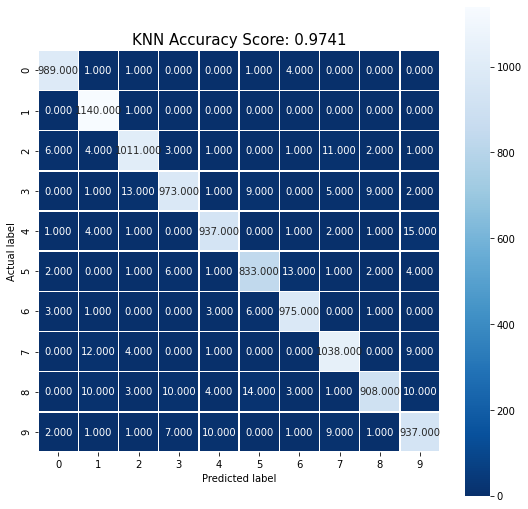

In [21]:
# Confusion Matrix Heatmap Visualization

plt.figure(figsize=(9,9))
sns.heatmap(cm_knn, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Accuracy Score: {0}'.format(score_knn)
plt.title(all_sample_title, size = 15);

In [22]:
# KNN Evaluation Report
inspect_performance(knn, train_img, train_lbl, test_img, test_lbl, preds_knn)  

Training score:  0.9859333333333333
Test score:  0.9741
Test report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1003
           1       1.00      0.97      0.98      1174
           2       0.97      0.98      0.97      1036
           3       0.96      0.97      0.97       999
           4       0.97      0.98      0.98       958
           5       0.97      0.97      0.97       863
           6       0.99      0.98      0.98       998
           7       0.98      0.97      0.97      1067
           8       0.94      0.98      0.96       924
           9       0.97      0.96      0.96       978

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## SVM

In [23]:
from sklearn import svm

The Best Parameters for Support Vector Machine:

C: 2.83
    
    Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel: rbf (default)

    Specifies the kernel type to be used in the algorithm.
    'rbf' stands for Radial Basis Function.

gamma: 0.007

    Kernel coefficient for 'rbf'

In [ ]:
# FIT SVM MODEL
clf_svm = svm.SVC(gamma=0.007, C=2.83, probability=True)
clf_svm.fit(train_img, train_lbl)

preds_svm = clf_svm.predict(test_img)

In [ ]:
score_svm = clf_svm.score(test_img, test_lbl)
print(f"SVM Score = {score_svm*100:.2f} %")

In [ ]:
# Inspecting Misclassified Images

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, preds_svm):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index = index + 1

# Plot the misclassified samples

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds_svm[badIndex], test_lbl[badIndex]), fontsize = 15)

In [ ]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm_svm = metrics.confusion_matrix(test_lbl, preds_svm)
print(cm_svm)

In [ ]:
# Confusion Matrix Heatmap Visualization

plt.figure(figsize=(9,9))
sns.heatmap(cm_svm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Accuracy Score: {0}'.format(score_svm)
plt.title(all_sample_title, size = 15);

In [ ]:
# SVM Evaluation Report
inspect_performance(clf_svm, train_img, train_lbl, test_img, test_lbl, preds_svm)  